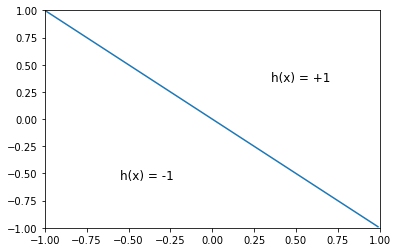

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def question3():
  fig, axs = plt.subplots(1, sharey=True)
  ranges = np.arange(-1, 1, 0.01)
  axs.set_xlim(xmin=-1,xmax=1)
  axs.set_ylim(ymin=-1,ymax=1)
  bound = [-x for x in ranges]
  axs.plot(ranges, bound)
  axs.text(-0.55, -0.55, "h(x) = -1", fontsize=12)
  axs.text(0.35, 0.35, "h(x) = +1", fontsize=12)
  fig.show()

question3()


gBar = [-0.0040262929933741615, 0.0004861293089235126], E_out = 0.5312093090854838, var + bias = 0.528981041701871, var = 0.33298871628951815, bias = 0.1959923254123528


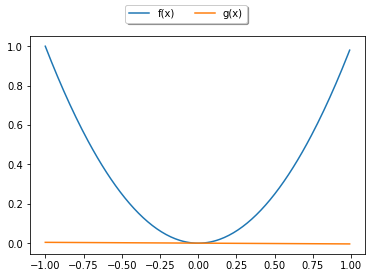

In [45]:
target_function = lambda x: x**2
model = lambda a, b, x: a * x + b 

def genPoint():
  x = np.random.uniform(-1,1)

  return (x, target_function(x))

def genData(num):
  ls = []
  for i in range(num):
    ls.append(genPoint())

  return ls

def question4(n):
    training_points = [genData(2) for i in range(n)]
    test_points = [genPoint() for i in range(n)]
    
    E_out = 0.0
    g_bar = [0.0, 0.0]
    g_all = []
    for i in training_points:
      [(x1, y1), (x2, y2)] = i
      a = x1 + x2
      b = -x1 * x2
      g_bar[0] += a
      g_bar[1] += b
      g_all.append((a, b))
      for x, y in test_points:
        g_x = model(a, b, x)
        sqr_err = (g_x - y)**2
        E_out += sqr_err
    E_out /= n**2
    g_bar = [g_bar[0] / n, g_bar[1] / n]
    
    bias = 0
    for i in training_points:
      [(x1, y1), (x2, y2)] = i
      g_bar_x1 = model(g_bar[0], g_bar[1], x1)
      g_bar_x2 = model(g_bar[0], g_bar[1], x2)
      bias += (g_bar_x1-y1)**2 + (g_bar_x2-y2)**2
    bias /= 2*n
    
    var = 0
    for a, b in g_all:
      for j in training_points:
        [(x1, y1), (x2, y2)] = j
        g_x1 = model(a, b, x1)
        g_bar_x1 = model(g_bar[0], g_bar[1], x1)
        g_x2 = model(a, b, x2)
        g_bar_x2 = model(g_bar[0], g_bar[1], x2)
        var += (g_x1 - g_bar_x1)**2 + (g_x2 - g_bar_x2)**2
    var /= n**2 * 2

    return g_bar, E_out, var, bias

def plot(g_bar):
  fig, axs = plt.subplots()
  ranges = np.arange(-1, 1, 0.01)
  target = [target_function(x) for x in ranges]
  axs.plot(ranges, target, label="f(x)")
  bar = [model(g_bar[0], g_bar[1], x) for x in ranges]
  axs.plot(ranges, bar, label="g(x)")
  fig.legend(loc='upper center', shadow=True, ncol=2)

g_bar, E_out, var, bias = question4(1000)
print("gBar = {}, E_out = {}, var + bias = {}, var = {}, bias = {}".format(g_bar, E_out, var + bias, var, bias))
plot(g_bar)